# Tema 3: Evaluación de algoritmos de clasificación
## Cuaderno de ejercicios

**Ejercicio 1**

**Evaluacion de un modelo de clasificacion con un filtro de spam**

Supongamos que queremos clasificar nuestros correos en spam (correo que no deseamos) y no spam (correo que queremos)

- **La matriz de confusión** que calculamos para nuestro primer modelo es la siguiente:

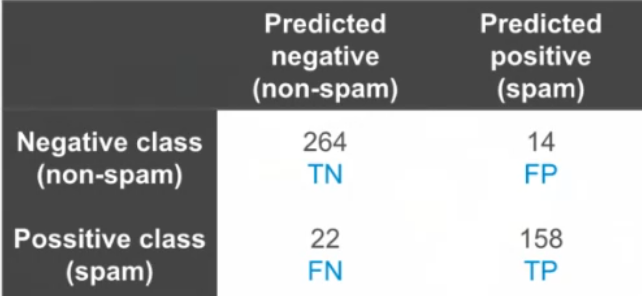

- **Tenemos que calcular**
- Acurracy (TP + TN) / (TP + FP + TN + FN)
- Precision (TP) / (TP + FP)
- Recall (TP) / (TP + FN)
- F1 (2 * Precision * recall / (Presicion + recall))

In [25]:
# Solucion Punto 1
#%pip install scikit-learn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np

In [2]:
TN = 264
TP = 158
FN = 22
FP = 14

In [ ]:
# Generate y_real and y_pred based on the given confusion matrix values
y_real = [0]*TN + [1]*TP + [1]*FN + [0]*FP
y_pred = [0]*TN + [1]*TP + [0]*FN + [1]*FP

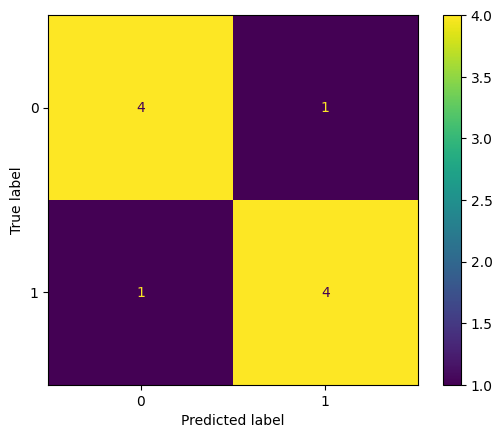

In [6]:
ConfusionMatrixDisplay.from_predictions(y_real, y_pred)

In [7]:
print(classification_report(y_real, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.800     0.800     0.800         5
           1      0.800     0.800     0.800         5

    accuracy                          0.800        10
   macro avg      0.800     0.800     0.800        10
weighted avg      0.800     0.800     0.800        10



In [8]:
#Solucion Manual.
Accurrancy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print(f"Accurrancy: {Accurrancy}")
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"F1: {F1}")

Accurrancy: 0.8
Precision: 0.8
Recall: 0.8
F1: 0.8000000000000002


**Ejercicio 2**

Supongamos que hemos utilizado un clasificador, por ejemplo, Naive Bayes, para clasificar documentos con respecto al sentimiento. Las clases son Pos (positivo), Neg (negativo) y Neu (neutro). Probamos nuestro clasificador en 10 documentos para los que conocemos su _gold standar_ (clase real). La prueba tiene los siguientes resultados:

| Documento | Clase Real | Clase predicha |
| ------------- | ------------- | ------------- |
| d1  | Pos  | Pos |
| d2  | Pos  | Pos |
| d3  | Pos  | Pos |
| d4  | Pos  | Neu |
| d5  | Neg  | Neg |
| d6  | Neg  | Neu |
| d7  | Neg  | Neg |
| d8  | Neu  | Pos |
| d9  | Neu  | Neu |
| d10  | Neu  | Neu |

Calcular: precision, recall, accuracy y F1 para estos resultados de clasificación para las tres clases.

Precicion (Pos, Neg, Neu): `array([0.75, 1.  , 0.5 ]),`

Recall (Pos, Neg, Neu): `array([0.75      , 0.66666667, 0.66666667]),`

F1 (Pos, Neg, Neu): `array([0.75      , 0.8       , 0.57142857]),`

In [42]:
# Etiquetas reales de cada documento
y_real = ["Pos", "Pos", "Pos", "Pos", "Neg", "Neg", "Neg", "Neu", "Neu", "Neu"]

# Etiquetas predichas para cada documento
y_pred = ["Pos", "Pos", "Pos", "Neu", "Neg", "Neu", "Neg", "Pos", "Neu", "Neu"]

# Definimos el orden de las etiquetas
labels = ["Pos", "Neg", "Neu"]


In [44]:
# Calculamos la matriz con filas = clases predichas y columnas = clases reales
cm = confusion_matrix(y_pred, y_real, labels=labels)
cm

array([[3, 0, 1],
       [0, 2, 0],
       [1, 1, 2]])

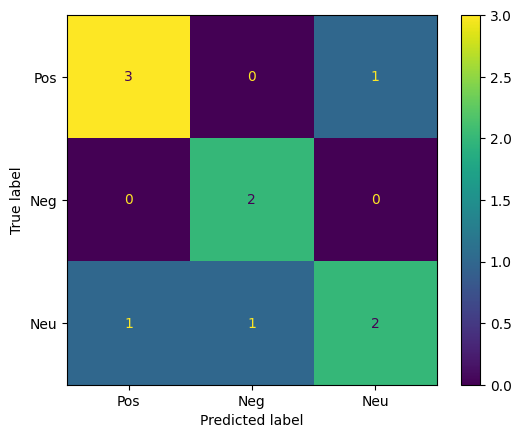

In [45]:
# Visualizamos la matriz
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()

In [47]:
# Mostrar precision and recall, junto con el resto de métricas
print(classification_report(y_real, y_pred, digits=3))

              precision    recall  f1-score   support

         Neg      1.000     0.667     0.800         3
         Neu      0.500     0.667     0.571         3
         Pos      0.750     0.750     0.750         4

    accuracy                          0.700        10
   macro avg      0.750     0.694     0.707        10
weighted avg      0.750     0.700     0.711        10



In [17]:
matriz_confusion = [
    [3, 0, 1],  # Predicción Pos
    [0, 2, 0],  # Predicción Neg
    [1, 1, 2]   # Predicción Neu
]

# Convert matriz_confusion to a NumPy array
matriz_confusion = np.array(matriz_confusion)

In [21]:
# Clase "Pos" (índice 0)
TP_pos = matriz_confusion[0, 0]
FP_pos = matriz_confusion[0, :].sum() - TP_pos
FN_pos = matriz_confusion[:, 0].sum() - TP_pos
precision_pos = TP_pos / (TP_pos + FP_pos)
recall_pos = TP_pos / (TP_pos + FN_pos)

# Clase "Neg" (índice 1)
TP_neg = matriz_confusion[1, 1]
FP_neg = matriz_confusion[1, :].sum() - TP_neg
FN_neg = matriz_confusion[:, 1].sum() - TP_neg
precision_neg = TP_neg / (TP_neg + FP_neg)
recall_neg = TP_neg / (TP_neg + FN_neg)

# Clase "Neu" (índice 2)
TP_neu = matriz_confusion[2, 2]
FP_neu = matriz_confusion[2, :].sum() - TP_neu
FN_neu = matriz_confusion[:, 2].sum() - TP_neu
precision_neu = TP_neu / (TP_neu + FP_neu)
recall_neu = TP_neu / (TP_neu + FN_neu)

# Valores obtenidos previamente
precision_pos, recall_pos = 0.75, 0.75
precision_neg, recall_neg = 1.0, 2/3
precision_neu, recall_neu = 0.5, 2/3

f1_pos = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)
f1_neg = 2 * (precision_neg * recall_neg) / (precision_neg + recall_neg)
f1_neu = 2 * (precision_neu * recall_neu) / (precision_neu + recall_neu)

In [23]:
print("Precisión Pos:", precision_pos)  # 0.75
print("Recall Pos:", recall_pos)          # 0.75
print("F1 Pos:", f1_pos)   # 0.75
print("-------------------------")
print("Precisión Neg:", precision_neg)      # 1.0
print("Recall Neg:", recall_neg)            # ~0.67
print("F1 Neg:", f1_neg)   # ~0.80
print("-------------------------")
print("Precisión Neu:", precision_neu)      # 0.5
print("Recall Neu:", recall_neu)            # ~0.67
print("F1 Neu:", f1_neu)   # ~0.57

Precisión Pos: 0.75
Recall Pos: 0.75
F1 Pos: 0.75
-------------------------
Precisión Neg: 1.0
Recall Neg: 0.6666666666666666
F1 Neg: 0.8
-------------------------
Precisión Neu: 0.5
Recall Neu: 0.6666666666666666
F1 Neu: 0.5714285714285715


**Ejercicio 2**

Se evaluó un clasificador binario utilizando un conjunto de 1000 ejemplos de prueba (test) en los que el 50 % de todos los ejemplos son negativos. El clasificador tiene 60 % de sensitivity y 70 % de accuracy. Escribe la matriz de confusión.

| |actual 1| actual 0|
| ---| --- | --- |
| predicted 1 | TP | FP |
| predicted 0 | FN | TN |

In [49]:
# Datos del ejercicio
total = 1000
positivos = 500  # 50% de 1000
negativos = 500  # 50% de 1000

# Métricas
sensitivity = 0.60   # Recall para la clase 1 (positivos)
accuracy = 0.70      # Accuracy general

# Cálculo de TP y FN
TP = int(sensitivity * positivos)  # TP = 0.60 * 500 = 300
FN = positivos - TP                # FN = 500 - 300 = 200

# Cálculo de TN y FP usando la accuracy:
# Accuracy = (TP + TN) / total  => TN = (accuracy * total) - TP
TN = int(accuracy * total - TP)    # TN = (0.70 * 1000) - 300 = 400
FP = negativos - TN                # FP = 500 - 400 = 100

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print("|             | Actual 1 | Actual 0 |")
print("|-------------|----------|----------|")
print(f"| Predicted 1 |   {TP:<5}  |   {FP:<5}  |")
print(f"| Predicted 0 |   {FN:<5}  |   {TN:<5}  |")


Matriz de Confusión:
|             | Actual 1 | Actual 0 |
|-------------|----------|----------|
| Predicted 1 |   300    |   100    |
| Predicted 0 |   200    |   400    |


**Ejercicio 3**

Utilizando la matriz de confusión creada en el ejercicio anterior, calcula la precisión del clasificador, la medida F1 y
especificidad.

In [51]:
# Valores de la matriz de confusión
TP = 300
FP = 100
FN = 200
TN = 400

# Precisión
precision = TP / (TP + FP)
print("Precisión:", precision)  # 0.75

# Sensibilidad (Recall)
sensitivity = TP / (TP + FN)
print("Sensibilidad (Recall):", sensitivity)  # 0.60

# F1-Score
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
print("F1-Score:", f1)  # Aproximadamente 0.667

# Especificidad
specificity = TN / (TN + FP)
print("Especificidad:", specificity)  # 0.80


Precisión: 0.75
Sensibilidad (Recall): 0.6
F1-Score: 0.6666666666666665
Especificidad: 0.8
